In [ ]:
!pip install -U sentence-transformers -q
!pip install git+https://github.com/Bots-Avatar/ExplainitAll -q

In [1]:
from explainitall.QA.extractive_qa_sbert.SVDBert import SVDBertModel
import numpy as np
from torch import nn
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

In [ ]:
path = 'FractalGPT/SbertSVDDistil'
model = SentenceTransformer(path)
model[0].auto_model = SVDBertModel.from_pretrained(path)

In [3]:
def sim(texts_1, texts_2, model):
  embedding_1 = model.encode(texts_1)
  embedding_2 = model.encode(texts_2)
  s = util.pytorch_cos_sim(embedding_1, embedding_2)
  return s.detach().numpy()

In [4]:
%%time
sim(["I'm happy",
     "Transistor (English transistor, an acronym invented in 1947 - from the English transfer + English resistor [1] - for a device for passing current through a resistance), semiconductor triode - an electronic component made of semiconductor material, capable of controlling a significant current into the output with a small input signal circuits, which allows it to be used to amplify, generate, switch and convert electrical signals. Currently, the transistor is the basis of the circuit design of the vast majority of electronic devices and integrated circuits.",
     "That is a happy dog",
     "Today is a sunny day",
     "An electric vacuum triode, or simply triode, is an electronic tube that allows an input signal to control the current in an electrical circuit. It has three electrodes: a thermionic cathode (direct or indirectly heated), an anode and one control grid."],

      ["Я счастлив",
       "Транзи́стор (англ. transistor, придуманный в 1947 году акроним — от англ. transfer + англ. resistor[1] — для устройства пропуска тока через сопротивление), полупроводнико́вый трио́д — электронный компонент из полупроводникового материала, способный небольшим входным сигналом управлять значительным током в выходной цепи, что позволяет использовать его для усиления, генерирования, коммутации и преобразования электрических сигналов. В настоящее время транзистор является основой схемотехники подавляющего большинства электронных устройств и интегральных микросхем.",
       "Это счастливая собака",
       "Сегодня солнечный день",
       "Эле́ктрова́куумный трио́д, или просто трио́д, — электронная лампа, позволяющая входным сигналом управлять током в электрической цепи. Имеет три электрода: термоэлектронный катод (прямого или косвенного накала), анод и одну управляющую сетку."],
    model)

CPU times: user 494 ms, sys: 34.6 ms, total: 528 ms
Wall time: 712 ms


array([[ 0.9262454 , -0.10817449,  0.5569258 ,  0.40069166,  0.05248137],
       [-0.10137349,  0.9214005 , -0.05908662, -0.05579952,  0.6043041 ],
       [ 0.56128216, -0.08206841,  0.9496385 ,  0.23291807,  0.03726077],
       [ 0.34002465, -0.05840789,  0.24094495,  0.9276679 ,  0.09676868],
       [-0.01571992,  0.6007775 , -0.00638369, -0.02819301,  0.8434112 ]],
      dtype=float32)

In [5]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: SVDBertModel 
  (1): Pooling({'word_embedding_dimension': 312, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Dense({'in_features': 312, 'out_features': 384, 'bias': True, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

# Квантование

In [6]:
import torch
from torch.quantization import quantize_dynamic

In [7]:
q_model = quantize_dynamic(model, dtype=torch.qint8)

In [8]:
%%time
sim(["I'm happy",
     "Transistor (English transistor, an acronym invented in 1947 - from the English transfer + English resistor [1] - for a device for passing current through a resistance), semiconductor triode - an electronic component made of semiconductor material, capable of controlling a significant current into the output with a small input signal circuits, which allows it to be used to amplify, generate, switch and convert electrical signals. Currently, the transistor is the basis of the circuit design of the vast majority of electronic devices and integrated circuits.",
     "That is a happy dog",
     "Today is a sunny day",
     "An electric vacuum triode, or simply triode, is an electronic tube that allows an input signal to control the current in an electrical circuit. It has three electrodes: a thermionic cathode (direct or indirectly heated), an anode and one control grid."],

      ["Я счастлив",
       "Транзи́стор (англ. transistor, придуманный в 1947 году акроним — от англ. transfer + англ. resistor[1] — для устройства пропуска тока через сопротивление), полупроводнико́вый трио́д — электронный компонент из полупроводникового материала, способный небольшим входным сигналом управлять значительным током в выходной цепи, что позволяет использовать его для усиления, генерирования, коммутации и преобразования электрических сигналов. В настоящее время транзистор является основой схемотехники подавляющего большинства электронных устройств и интегральных микросхем.",
       "Это счастливая собака",
       "Сегодня солнечный день",
       "Эле́ктрова́куумный трио́д, или просто трио́д, — электронная лампа, позволяющая входным сигналом управлять током в электрической цепи. Имеет три электрода: термоэлектронный катод (прямого или косвенного накала), анод и одну управляющую сетку."],
    q_model)

CPU times: user 91.9 ms, sys: 4.75 ms, total: 96.7 ms
Wall time: 118 ms


array([[ 0.90170497, -0.08706602,  0.57572925,  0.37629965,  0.08418058],
       [-0.0526887 ,  0.9197455 , -0.02326937, -0.04887373,  0.60938805],
       [ 0.55258334, -0.05668326,  0.94123393,  0.21967652,  0.04993816],
       [ 0.36324674, -0.04959971,  0.28311524,  0.9080912 ,  0.11595405],
       [ 0.01220177,  0.5963864 ,  0.01813783, -0.00568322,  0.8343582 ]],
      dtype=float32)

In [9]:
sbert_312 = SentenceTransformer(modules=[model[0], model[1]])

In [10]:
%%time
sim(["I'm happy",
     "Transistor (English transistor, an acronym invented in 1947 - from the English transfer + English resistor [1] - for a device for passing current through a resistance), semiconductor triode - an electronic component made of semiconductor material, capable of controlling a significant current into the output with a small input signal circuits, which allows it to be used to amplify, generate, switch and convert electrical signals. Currently, the transistor is the basis of the circuit design of the vast majority of electronic devices and integrated circuits.",
     "That is a happy dog",
     "Today is a sunny day",
     "An electric vacuum triode, or simply triode, is an electronic tube that allows an input signal to control the current in an electrical circuit. It has three electrodes: a thermionic cathode (direct or indirectly heated), an anode and one control grid."],

      ["Я счастлив",
       "Транзи́стор (англ. transistor, придуманный в 1947 году акроним — от англ. transfer + англ. resistor[1] — для устройства пропуска тока через сопротивление), полупроводнико́вый трио́д — электронный компонент из полупроводникового материала, способный небольшим входным сигналом управлять значительным током в выходной цепи, что позволяет использовать его для усиления, генерирования, коммутации и преобразования электрических сигналов. В настоящее время транзистор является основой схемотехники подавляющего большинства электронных устройств и интегральных микросхем.",
       "Это счастливая собака",
       "Сегодня солнечный день",
       "Электрова́куумный триод, или просто триод, — электронная лампа, позволяющая входным сигналом управлять током в электрической цепи. Имеет три электрода: термоэлектронный катод (прямого или косвенного накала), анод и одну управляющую сетку."],
    sbert_312)

CPU times: user 102 ms, sys: 92 µs, total: 102 ms
Wall time: 103 ms


array([[ 0.9049133 , -0.00636031,  0.54413795,  0.35715044,  0.04963446],
       [ 0.01787417,  0.9338206 ,  0.08463654,  0.08694246,  0.71723324],
       [ 0.5342256 ,  0.05966663,  0.9294663 ,  0.2054509 ,  0.09953786],
       [ 0.33458275,  0.06793597,  0.28076306,  0.91568744,  0.14867736],
       [ 0.02551784,  0.73265505,  0.08888005,  0.10234769,  0.8842878 ]],
      dtype=float32)

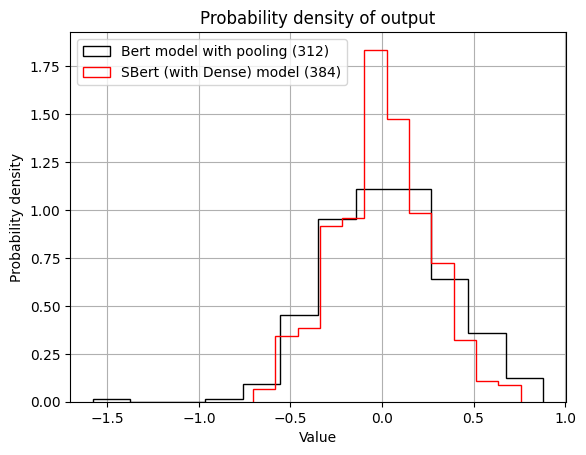

In [11]:
text = 'kittens love milk'
output_vector_312 = sbert_312.encode(text)
output_vector = model.encode(text)
plt.hist(output_vector_312, bins=12, density=True, label="Bert model with pooling (312)", histtype="step", color='black')
plt.hist(output_vector, bins=12, density=True, label="SBert (with Dense) model (384)", histtype="step", color='r')
plt.grid()
plt.title("Probability density of output")
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.legend()

In [12]:
q_sbert_312 = quantize_dynamic(sbert_312, dtype=torch.qint8)

In [13]:
%%time
sim(["I'm happy",
     "Transistor (English transistor, an acronym invented in 1947 - from the English transfer + English resistor [1] - for a device for passing current through a resistance), semiconductor triode - an electronic component made of semiconductor material, capable of controlling a significant current into the output with a small input signal circuits, which allows it to be used to amplify, generate, switch and convert electrical signals. Currently, the transistor is the basis of the circuit design of the vast majority of electronic devices and integrated circuits.",
     "That is a happy dog",
     "Today is a sunny day",
     "An electric vacuum triode, or simply triode, is an electronic tube that allows an input signal to control the current in an electrical circuit. It has three electrodes: a thermionic cathode (direct or indirectly heated), an anode and one control grid."],

      ["Я счастлив",
       "Транзи́стор (англ. transistor, придуманный в 1947 году акроним — от англ. transfer + англ. resistor[1] — для устройства пропуска тока через сопротивление), полупроводнико́вый трио́д — электронный компонент из полупроводникового материала, способный небольшим входным сигналом управлять значительным током в выходной цепи, что позволяет использовать его для усиления, генерирования, коммутации и преобразования электрических сигналов. В настоящее время транзистор является основой схемотехники подавляющего большинства электронных устройств и интегральных микросхем.",
       "Это счастливая собака",
       "Сегодня солнечный день",
       "Эле́ктрова́куумный трио́д, или просто трио́д, — электронная лампа, позволяющая входным сигналом управлять током в электрической цепи. Имеет три электрода: термоэлектронный катод (прямого или косвенного накала), анод и одну управляющую сетку."],
    q_sbert_312)

CPU times: user 87.1 ms, sys: 8.04 ms, total: 95.1 ms
Wall time: 97 ms


array([[0.8818517 , 0.02728385, 0.5688089 , 0.33861178, 0.08981378],
       [0.05864458, 0.9332169 , 0.0919323 , 0.08982581, 0.7067331 ],
       [0.5185593 , 0.08221251, 0.920032  , 0.18688129, 0.11510709],
       [0.35671365, 0.08876144, 0.3141083 , 0.89372164, 0.18184467],
       [0.06170292, 0.73672575, 0.09897554, 0.11768132, 0.8826133 ]],
      dtype=float32)

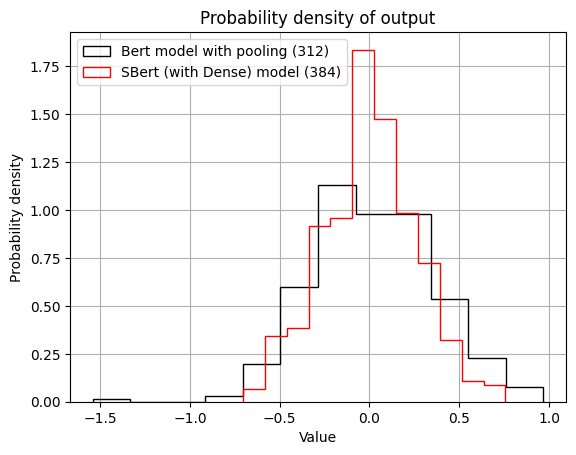

In [14]:
text = 'kittens love milk'
output_vector_312 = q_sbert_312.encode(text)
output_vector = model.encode(text)
plt.hist(output_vector_312, bins=12, density=True, label="Bert model with pooling (312)", histtype="step", color='black')
plt.hist(output_vector, bins=12, density=True, label="SBert (with Dense) model (384)", histtype="step", color='r')
plt.grid()
plt.title("Probability density of output")
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.legend()